In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
original_path = "/content/drive/My Drive/NIDA/Project/Deep learning/Final project/original_single.csv"
augment_path =  "/content/drive/My Drive/NIDA/Project/Deep learning/Final project/augment_single.csv"

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
df = pd.read_csv(original_path)
df.head()

,Path,File,Class
0,D:\Education\Nida\Deep learning\Aj.titirat\gro...,ก_AumC1.jpg,ก
1,D:\Education\Nida\Deep learning\Aj.titirat\gro...,ก_AumC2.jpg,ก
2,D:\Education\Nida\Deep learning\Aj.titirat\gro...,ก_AumC3.jpg,ก
3,D:\Education\Nida\Deep learning\Aj.titirat\gro...,ก_AumC4.jpg,ก
4,D:\Education\Nida\Deep learning\Aj.titirat\gro...,ก_AumC5.jpg,ก


In [0]:
orig_class = pd.DataFrame(df.Class.value_counts())
orig_class['class'] = orig_class.index
orig_class = orig_class.rename(columns={"Class": "freq"})
orig_class = orig_class[["class", "freq"]]
orig_class.head()

,class,freq
น,น,857
อา,อา,750
ร,ร,685
ส,ส,573
ก,ก,463


In [0]:
orig_class = orig_class.sort_values('class')
orig_class

,class,freq
ก,ก,463
ข,ข,152
ฃ,ฃ,131
ค,ค,270
ฅ,ฅ,112
ฆ,ฆ,134
ง,ง,385
จ,จ,288
ฉ,ฉ,127
ช,ช,179


In [0]:
!wget https://noto-website-2.storage.googleapis.com/pkgs/NotoSansThai-hinted.zip
!unzip NotoSansThai-hinted.zip

--2020-05-21 05:46:17--  https://noto-website-2.storage.googleapis.com/pkgs/NotoSansThai-hinted.zip
Resolving noto-website-2.storage.googleapis.com (noto-website-2.storage.googleapis.com)... 173.194.216.128, 2607:f8b0:400c:c12::80
Connecting to noto-website-2.storage.googleapis.com (noto-website-2.storage.googleapis.com)|173.194.216.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1385336 (1.3M) [application/zip]
Saving to: ‘NotoSansThai-hinted.zip.2’

NotoSansThai-hinted 100%[===================>]   1.32M  --.-KB/s    in 0.01s   

2020-05-21 05:46:17 (122 MB/s) - ‘NotoSansThai-hinted.zip.2’ saved [1385336/1385336]

Archive:  NotoSansThai-hinted.zip
replace LICENSE_OFL.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: LICENSE_OFL.txt         
replace NotoSansThai-Black.ttf? [y]es, [n]o, [A]ll, [N]one, [r]ename: a
error:  invalid response [a]
replace NotoSansThai-Black.ttf? [y]es, [n]o, [A]ll, [N]one, [r]ename: a
error:  invalid response [a]
replace 

In [0]:
import matplotlib.font_manager as fm
path = 'NotoSansThaiUI-Regular.ttf'
fontprop = fm.FontProperties(fname=path)

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 108 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 112 missing from current font.
  font.set_text(s, 0.0, flags=flags)


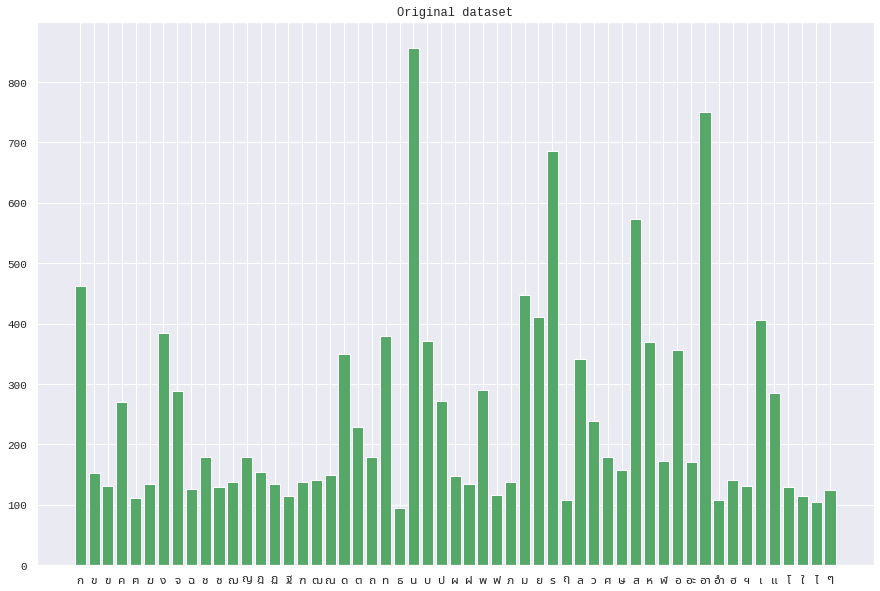

In [0]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = [15, 10]
x = np.arange(1,56)
y = orig_class['freq'].to_list()
x_lab = orig_class['class'].to_list()
ax = plt.gca(xticks=x)
ax.set_xticklabels(x_lab, fontproperties=fontprop)
plt.bar(x,y,color='g')
plt.title('Original dataset')
plt.show()

In [0]:
df2 = pd.read_csv(augment_path)
df2.head()

,Path,File,Class
0,D:\Education\Nida\Deep learning\Aj.titirat\gro...,ก_AumC1.jpg,ก
1,D:\Education\Nida\Deep learning\Aj.titirat\gro...,ก_4742.jpg,ก
2,D:\Education\Nida\Deep learning\Aj.titirat\gro...,ก_6712.jpg,ก
3,D:\Education\Nida\Deep learning\Aj.titirat\gro...,ก_6465.jpg,ก
4,D:\Education\Nida\Deep learning\Aj.titirat\gro...,ก_6520.jpg,ก


In [0]:
orig_class2 = pd.DataFrame(df2.Class.value_counts())
orig_class2['class'] = orig_class2.index
orig_class2 = orig_class2.rename(columns={"Class": "freq"})
orig_class2 = orig_class2[["class", "freq"]]
orig_class2.head()

,class,freq
น,น,4457
อา,อา,3810
ร,ร,3585
ส,ส,3045
ก,ก,2420


In [0]:
orig_class2 = orig_class2.sort_values('class')
orig_class2

,class,freq
ก,ก,2420
ข,ข,928
ฃ,ฃ,834
ค,ค,1517
ฅ,ฅ,739
ฆ,ฆ,840
ง,ง,2102
จ,จ,1620
ฉ,ฉ,815
ช,ช,1075


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 108 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 112 missing from current font.
  font.set_text(s, 0.0, flags=flags)


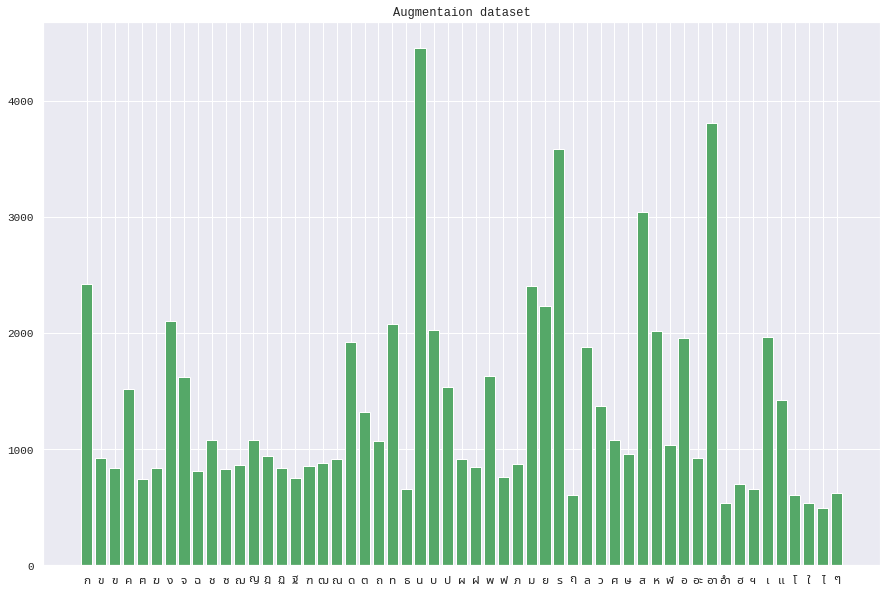

In [0]:
import matplotlib
x2 = np.arange(1,56)
y2 = orig_class2['freq'].to_list()
x_lab2 = orig_class2['class'].to_list()
ax2 = plt.gca(xticks=x2)
ax2.set_xticklabels(x_lab2, fontproperties=fontprop)
plt.bar(x2,y2,color='g')
plt.title('Augmentaion dataset')
plt.show()

In [0]:
orig_class2.freq.sum()

75380

In [0]:
orig_class2.freq.mean()

1370.5454545454545

In [0]:
orig_class2.freq.median()

961.0

In [0]:
orig_class2.freq.min()

491